# EDA and Data Loading


## Load data

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
relative_path = "../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(relative_path)

df.head(2)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


## Basic Data Overview

In [3]:
# dataset shape
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The dataset consists of:
- 18 categorical (object) features
- 2 integer numeric features (SeniorCitizen, tenure)
- 1 floating-point numeric feature (MonthlyCharges)
- The target variable Churn is also stored as a categorical variable.
- The dataset contains 7043 rows and 21 columns.

In [5]:
df.describe(include="all")

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


Most categorical columns in the dataset have only 2–3 unique values.
This is useful because:
- Columns with 2 unique values (e.g., Yes/No, Male/Female) can be mapped to binary features (0/1).
- Columns with 3 unique values (e.g., InternetService: DSL, Fiber optic, No) are suitable for one-hot encoding, since expanding to 3 dummy variables is still manageable.

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

The output shows:
- No missing values in any of the 21 columns
- All customer records are complete


In [11]:
print(df.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


## Binary encodings

- If feature has "No internet service” → They cannot have the service → This is equivalent to No
- Also for phoneservice if no service-> No

In [ ]:
replace_cols = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

for col in replace_cols:
    df[col] = df[col].replace({'No internet service': 'No'})

df['MultipleLines'] = df['MultipleLines'].replace({'No phone service': 'No'})

##### Ensure the values changed

In [17]:
for i in replace_cols:
    print(df[i].unique())
print(df['MultipleLines'].unique())

[0 1]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
['No' 'Yes']


##### Adding these new binary values to our list of old binary values. 

In [18]:
binary_cols = [
    'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn',
]

for i in replace_cols:
    binary_cols.append(i)

binary_cols.append('MultipleLines')

df['gender'] = df['gender'].replace({'Male': 0, 'Female': 1})

df[binary_cols] = df[binary_cols].replace({"Yes":1, "No":0, "yes":1, "no":0})
binary_cols.append('gender')
df[binary_cols]


/var/folders/bp/4_55wxy95dq1vxpc3jjpdxxr0000gn/T/ipykernel_33370/3822774573.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_cols] = df[binary_cols].replace({"Yes":1, "No":0, "yes":1, "no":0})


,Partner,Dependents,PhoneService,PaperlessBilling,Churn,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,gender
0,1,0,0,1,0,0,1,0,0,0,0,0,1
1,0,0,1,0,0,1,0,1,0,0,0,0,0
2,0,0,1,1,1,1,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,1,1,0,0,0,0
4,0,0,1,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,0,1,0,1,1,1,1,1,0
7039,1,1,1,1,0,0,1,1,0,1,1,1,1
7040,1,1,0,1,0,1,0,0,0,0,0,0,1
7041,1,0,1,1,1,0,0,0,0,0,0,1,0


## Cleaning the data

#### Check columns that are non-numeric

In [23]:
one_hot = df.select_dtypes(include="object").columns

for i in one_hot:
    string = i + ": "
    print(string)
    print(df[i].unique())

customerID: 
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
InternetService: 
['DSL' 'Fiber optic' 'No']
Contract: 
['Month-to-month' 'One year' 'Two year']
PaymentMethod: 
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges: 
['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']


#### Remove customerID

In [24]:
df = df.drop(columns=['customerID'])

#### Conver TotalCharges to numeric from objects

In [26]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(df['TotalCharges'].isnull().sum())

11


We notice that after the change 11 examples got null values which was predictable because if the value is "", pd.to_numeric changes the value to NaN. I am using median value imputation to fill the blanks. 

In [27]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())
print(df['TotalCharges'].isnull().sum())

0


## One-hot encoding

#### One-hot encode the remaining categorical columns

In [28]:
ohe_cols = ['InternetService', 'Contract', 'PaymentMethod']

df = pd.get_dummies(df, columns=ohe_cols, drop_first=True)



#### Those new features are now booleans which we should convert to 1/0. 

In [30]:
bool_cols = df.select_dtypes(include="bool").columns
df[bool_cols] = df[bool_cols].astype(int)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   MultipleLines                          7043 non-null   int64  
 7   OnlineSecurity                         7043 non-null   int64  
 8   OnlineBackup                           7043 non-null   int64  
 9   DeviceProtection                       7043 non-null   int64  
 10  TechSupport                            7043 non-null   int64  
 11  Stre

## Correlations

We use correlation instead of covariance because correlation normalizes the covariance by the variability of each feature, giving a standardized value between –1 and +1. This makes correlations easy to interpret and comparable across variables, allowing us to clearly see which features move together and which ones are most related to the target (churn).

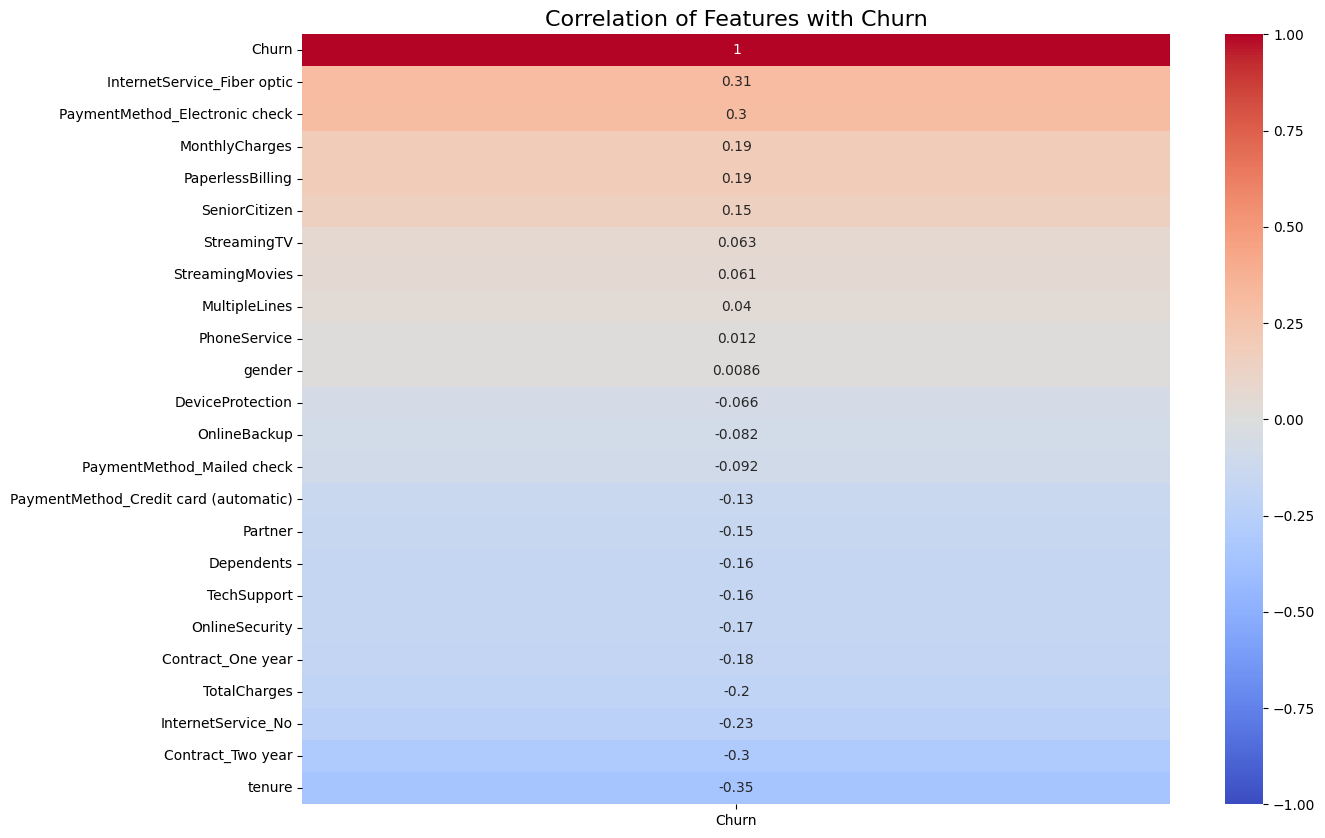

In [48]:
correlation_matrix = df.corr('pearson',numeric_only=True)

#only correlations between variable and churn
correlation_matrix_churn = correlation_matrix["Churn"].sort_values(ascending=False)

plt.figure(figsize=(14,10))
sns.heatmap(correlation_matrix_churn.to_frame(),annot=True,cmap='coolwarm', vmax=1,vmin=-1)
plt.title("Correlation of Features with Churn", fontsize=16)
plt.show()

#### Largest negative correaltions:
- tenure (-0.35)
- contract_Two year (-0.3)

#### Lagest positive correlations:
- internetService_Fiber optic (0.31)
- PaymentMethod_Electronic check (0.3)

#### Short interpretation on these

High-churn customers tend to:
- Have Fiber optic internet
- Pay via Electronic check
- Be newer customers with low tenure
- Use month-to-month contracts

Low-churn customers tend to:
- Be long-term (high tenure)
- Be on long-term contracts (1 or 2 years)
- Have more stable billing methods



## Multicolinearity (VIF)

#### Why this matters:
In logistic regression, multicollinearity:

- makes coefficients unstable
- inflates variance
- reduces interpretability
- can harm model performance

Tree-based models (XGBoost, RandomForest) don’t care, but linear models do.

In [50]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,0,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,0,0,1,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,0,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,0,0,1,0,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,1,0,0,0,0,1,0


In [54]:
##dropping the label column
X = df.drop(columns=['Churn'])
X = X.dropna()

In [56]:
##Adding a constant
from statsmodels.tools.tools import add_constant
X_const = add_constant(X)

In [57]:
#Running the VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

vif = pd.DataFrame()
vif["feature"] = X_const.columns
vif["VIF"] = [
    variance_inflation_factor(X_const.values, i)
    for i in range(X_const.shape[1])
]

# Ignore constant
vif = vif[vif["feature"] != "const"]

vif = vif.sort_values("VIF", ascending=False)
print(vif)



                                  feature         VIF
15                         MonthlyCharges  865.066041
17            InternetService_Fiber optic  148.263438
18                     InternetService_No  104.219371
6                            PhoneService   34.861870
13                        StreamingMovies   24.109793
12                            StreamingTV   24.056872
16                           TotalCharges   10.675411
5                                  tenure    7.407607
7                           MultipleLines    7.274160
10                       DeviceProtection    6.922501
9                            OnlineBackup    6.783323
11                            TechSupport    6.467578
8                          OnlineSecurity    6.336238
20                      Contract_Two year    2.628609
22         PaymentMethod_Electronic check    1.976212
23             PaymentMethod_Mailed check    1.860564
19                      Contract_One year    1.621968
21  PaymentMethod_Credit car

If the value is over 6 there is clear multicolinearity. There are a few different methods to tackle this problem:
- Usign forest based models, these don't care about multicolinearity (the splits are done based on feature importance for reducing impurity) -> redundant variables compete but won't cause unstable predictions
- We can use regularization methods to drop some features, for instance, Lasso regression could be a good choise. 

## Metrics

In [58]:
## Quick check of how the class is balanced

Y = df['Churn']
Y.value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

If we don't balance out class properly, the model will predict the class with higher count more often. For this Churn task, I consider recall and F1 metrics to be the most important

#### Why recall matters here:
-   Recall answers: “Of all customers who actually churned, how many did we correctly identify?”
-   In churn problems, false negatives are costly (missing a churner means no intervention).
-   High recall means you catch most at-risk customers, even if you sometimes flag safe ones.

#### Why F1 matters here:
-   Accuracy is misleading with imbalance (predicting “no churn” always gives ~73% accuracy).
-   Find churners (recall)
-   Not over-predict churn (precision)



### Split

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, Y,
    test_size=0.2,
    random_state=42,
    stratify=Y
)

#stratify preserves the churn ratio in both sets!


In [66]:
##Added threshold to boost recall

THRESHOLD = 0.3 

## Model Selection

#### Logistic Regression
What we’re doing:
-   Building a simple, interpretable baseline

Why:
-   Understand direction and strength of churn drivers
#### LASSO
What we’re doing:
-   Adding regularization to select important features

Why:
-   Reduce complexity and identify key predictors
#### Random Forest
What we’re doing: 
-   Allowing nonlinear relationships and interactions

Why: 
-   Improve predictive performance without heavy tuning
#### XGBoost
What we’re doing:
-   Training a powerful gradient-boosted model

Why: 
-   Maximize predictive accuracy and recall

### Logistic Regression

In [78]:

#Logistic as a baseline model

from sklearn.metrics import (
    classification_report,
    roc_auc_score,
    confusion_matrix
)
import time
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

logit = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(
        max_iter=1000,
        class_weight='balanced'
    ))
])
print("Logistic Regression")
start_train = time.time()
logit.fit(X_train, y_train)
train_time = time.time()-start_train
print(f"Training time: {train_time} seconds")

start_train = time.time()
probs = logit.predict_proba(X_test)[:, 1]
y_pred = (probs >= THRESHOLD).astype(int)
train_time = time.time()-start_train
print(f"Prediction time: {train_time} seconds")

print("ROC AUC:", roc_auc_score(y_test, probs))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Logistic Regression
Training time: 0.041741132736206055 seconds
Prediction time: 0.0010120868682861328 seconds
ROC AUC: 0.8414141414141414
[[573 462]
 [ 27 347]]
              precision    recall  f1-score   support

           0       0.95      0.55      0.70      1035
           1       0.43      0.93      0.59       374

    accuracy                           0.65      1409
   macro avg       0.69      0.74      0.64      1409
weighted avg       0.82      0.65      0.67      1409



### Lasso regression

In [77]:
lasso = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(
        penalty='l1',
        solver='liblinear',
        class_weight='balanced',
        max_iter=1000
    ))
])
print("LASSO")
start_train = time.time()
lasso.fit(X_train, y_train)
train_time = time.time()-start_train
print(f"Training time: {train_time} seconds")

start_train = time.time()
probs = lasso.predict_proba(X_test)[:, 1]
y_pred = (probs >= THRESHOLD).astype(int)
train_time = time.time()-start_train
print(f"Prediction time: {train_time} seconds")


print("ROC AUC:", roc_auc_score(y_test, probs))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


LASSO


/Users/makelele/ml_projects/churn_project/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/Users/makelele/ml_projects/churn_project/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(


Training time: 0.8001000881195068 seconds
Prediction time: 0.005624055862426758 seconds
ROC AUC: 0.8414218915497688
[[574 461]
 [ 27 347]]
              precision    recall  f1-score   support

           0       0.96      0.55      0.70      1035
           1       0.43      0.93      0.59       374

    accuracy                           0.65      1409
   macro avg       0.69      0.74      0.64      1409
weighted avg       0.82      0.65      0.67      1409



### Random forest

In [76]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    min_samples_leaf=50,
    random_state=42,
    class_weight='balanced'
)
print("Random Forest")
start_train = time.time()
rf.fit(X_train, y_train)
train_time = time.time()-start_train
print(f"Training time: {train_time} seconds")

start_train = time.time()
probs = rf.predict_proba(X_test)[:, 1]
y_pred = (probs >= THRESHOLD).astype(int)
train_time = time.time()-start_train
print(f"Prediction time: {train_time} seconds")

print("ROC AUC:", roc_auc_score(y_test, probs))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Random Forest
Training time: 0.5859901905059814 seconds
Prediction time: 0.02770400047302246 seconds
ROC AUC: 0.8461753080678911
[[528 507]
 [ 25 349]]
              precision    recall  f1-score   support

           0       0.95      0.51      0.66      1035
           1       0.41      0.93      0.57       374

    accuracy                           0.62      1409
   macro avg       0.68      0.72      0.62      1409
weighted avg       0.81      0.62      0.64      1409



### XGBoost

In [75]:
from xgboost import XGBClassifier
import time

scale_ps_weight = (y_train == 0).sum() / (y_train==1).sum()

xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42,
    scale_pos_weight=scale_ps_weight
)
print("XGBoost")
start_train = time.time()
xgb.fit(X_train, y_train)
train_time = time.time()-start_train
print(f"Training time: {train_time} seconds")

start_train = time.time()
probs = xgb.predict_proba(X_test)[:, 1]
y_pred = (probs >= THRESHOLD).astype(int)
train_time = time.time()-start_train
print(f"Prediction time: {train_time} seconds\n")

print("ROC AUC:", roc_auc_score(y_test, probs))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


XGBoost
Training time: 0.33042192459106445 seconds
Prediction time: 0.0029449462890625 seconds

ROC AUC: 0.8336627140974967
[[674 361]
 [ 54 320]]
              precision    recall  f1-score   support

           0       0.93      0.65      0.76      1035
           1       0.47      0.86      0.61       374

    accuracy                           0.71      1409
   macro avg       0.70      0.75      0.69      1409
weighted avg       0.80      0.71      0.72      1409

